# The $0$-Rook Monoid and its Representation Theory


Joel Gay and Florent Hivert

$\newcommand{\emptyw}{\varepsilon}
\DeclareMathOperator{\code}{code}
\DeclareMathOperator{\decode}{decode}
\newcommand{\Z}{\mathbb{Z}}
\newcommand{\un}[1]{\underline{#1}}$

## Rook vectors

A *rook vector* of size $n$ is encoded by a tuple whose element belongs to $\{0, \dots, n\}$ and such that each non zero integer appears at most one. The number of rook vector is
$$
\sum_{r=0}^n \binom{n}{r}^2 r!
$$
($r$ denotes the number of non zero entries).

In [1]:
# %load -s rook_number rook0.sage
@cached_function
def rook_number(n):
    r"""
    The number of rooks

    EXAMPLES::

        sage: [rook_number(i) for i in range(10)]
        [1, 2, 7, 34, 209, 1546, 13327, 130922, 1441729, 17572114]
        sage: rook_number(10)
        234662231
        sage: sum(c(10, k) for k in range(11))
        234662231
    """
    return sum(binomial(n, r)^2 * factorial(r) for r in range(n+1))

In [2]:
[rook_number(i) for i in range(10)]

[1, 2, 7, 34, 209, 1546, 13327, 130922, 1441729, 17572114]

### Rook triangle 

Count the rook according to the position of the first zero

Implementation using Lemma 3.28, page 19



In [3]:
# %load -s c rook0.sage
@cached_function
def c(n, k):
    """
    Rook triangle : count the rook according to the position of the first zero

    Alternative implementation using Lemma 3.28, page 19

    EXAMPLES::

        sage: [[c(n, k) for k in range(n+1)] for n in range(8)]
        [[1],
         [1, 1],
         [3, 2, 2],
         [13, 9, 6, 6],
         [73, 52, 36, 24, 24],
         [501, 365, 260, 180, 120, 120],
         [4051, 3006, 2190, 1560, 1080, 720, 720],
         [37633, 28357, 21042, 15330, 10920, 7560, 5040, 5040]]
    """
    if k < 0 or k > n: return 0
    if n == 0: return 1
    return (c(n-1, k)*(n-k-1) + c(n-1, k-1)*k +
            sum(c(n-1, k1) for k1 in range (k, n+1)))

In [4]:
[[c(n, k) for k in range(n+1)] for n in range(9)]

[[1],
 [1, 1],
 [3, 2, 2],
 [13, 9, 6, 6],
 [73, 52, 36, 24, 24],
 [501, 365, 260, 180, 120, 120],
 [4051, 3006, 2190, 1560, 1080, 720, 720],
 [37633, 28357, 21042, 15330, 10920, 7560, 5040, 5040],
 [394353, 301064, 226856, 168336, 122640, 87360, 60480, 40320, 40320]]

In [5]:
# %load -s is_rook rook0.sage
def is_rook(r):
    r"""
    Test for rook

    EXAMPLES::

        sage: is_rook((0, 1, 4, 3, 2))
        True
        sage: is_rook((0, 1, 5, 3, 2))
        True
        sage: is_rook((0, 1, 6, 3, 2))
        False
        sage: is_rook((0, 1, 2, 3, 2))
        False
        sage: is_rook((0, -1, 2, 3, 0))
        False
    """
    n = len(r)
    for i in r:
        if not (0 <= i <= n):
            return False
    for i in range(1, n+1):
        if r.count(i) > 1:
            return False
    return True


In [6]:
is_rook((0, 1, 4, 3, 2))

True

In [7]:
is_rook((0, 1, 5, 3, 2))

True

In [8]:
is_rook((0, 1, 6, 3, 2))

False

In [9]:
is_rook((0, 1, 2, 3, 2))

False

In [10]:
is_rook((0, -1, 2, 3, 0))

False

We enumerate rook vector recursively as follows: from a rook of size $n-1$, we get a rook of size $n$ by

- either insert $n$ at any place
- either insert a $0$. To get each rook ony once, we choose to always insert before any other $0$.

Starting from the set of rooks of size $n-1$, one gets each rook of size $n$ exactly once.

In [11]:
# %load -s first_zero rook0.sage
def first_zero(r):
    r"""
    The position of the first zero

    EXAMPLES::

        sage: first_zero((1,2,0,2,0))
        2

    TESTS:

        sage: for n in range(7):
        ....:     l = [first_zero(r) for r in rooks(n)]
        ....:     for k in range(n+1):
        ....:         assert(l.count(k) == c(n, k))
    """
    if 0 in r:
        return r.index(0)
    else:
        return len(r)

In [12]:
first_zero((1,2,0,2,0))

2

Here is a function to generate rooks

In [13]:
def rooks_iter(n):
    if n == 0: 
        yield ()
    else: 
        for r in rooks(n-1):
            for i in range(n):
                yield r[:i]+(n,)+r[i:]
            try:
                fz = r.index(0)
            except ValueError:
                fz = n-1
            for i in range(fz+1):
                yield r[:i]+(0,)+r[i:]
def rooks(n):
    return list(rooks_iter(n))

In [14]:
rooks(0)

[()]

In [15]:
rooks(1)

[(1,), (0,)]

In [16]:
rooks(2)

[(2, 1), (1, 2), (0, 1), (1, 0), (2, 0), (0, 2), (0, 0)]

In [17]:
rooks(3)

[(3, 2, 1),
 (2, 3, 1),
 (2, 1, 3),
 (0, 2, 1),
 (2, 0, 1),
 (2, 1, 0),
 (3, 1, 2),
 (1, 3, 2),
 (1, 2, 3),
 (0, 1, 2),
 (1, 0, 2),
 (1, 2, 0),
 (3, 0, 1),
 (0, 3, 1),
 (0, 1, 3),
 (0, 0, 1),
 (3, 1, 0),
 (1, 3, 0),
 (1, 0, 3),
 (0, 1, 0),
 (1, 0, 0),
 (3, 2, 0),
 (2, 3, 0),
 (2, 0, 3),
 (0, 2, 0),
 (2, 0, 0),
 (3, 0, 2),
 (0, 3, 2),
 (0, 2, 3),
 (0, 0, 2),
 (3, 0, 0),
 (0, 3, 0),
 (0, 0, 3),
 (0, 0, 0)]

Let's perform some consistency test

In [18]:
for n in range(9):
    assert(len(rooks(n)) == rook_number(n))

In [19]:
for n in range(7):
    l = [first_zero(r) for r in rooks(n)]
    for k in range(n+1):
         assert(l.count(k) == c(n, k))

## Rooks and $R$-Codes

In this section, we check the combinatorics of $R$-code and reduced word in $0$- and $1$-rook monoids
The primary goal is to check that Definition 3.37, page 22 is correct.

### Function $m$ of Definition 3.16, page 16

To each word $\un{w}$ over $\Z$, we associate a nonnegative number $m(\un{w})$ defined recursively by: $m(\emptyw) = 0$ and for any word $\un{w}$ and any letter $d$,
  \begin{equation}
    m(\un{w} d) :=
    \begin{cases}
      -d  & \text{if $d\leq0\,$;} \\
      m(\un{w})+1 & \text{if $0<d\leq m(\un{w})+1\,$;} \\
      m(\un{w})   & \text{if $d> m(\un{w})+1\,$.}
    \end{cases}
  \end{equation}


In [20]:
# %load -s mcode_ref rook0.sage
def mcode_ref(c):
    r"""
    Fonction m (Definition 3.16, page 16)

    EXAMPLES::

        sage: mcode_ref((1, 2, 8, 3, 6, 4, 2, 7))
        5
        sage: mcode_ref((3, 6, 4, -4, 2, 9, 4, -3, 5, 2, 5, 3, 8))
        6
        sage: mcode_ref((3, 6, 4, -4, 2, 9, 4, -3))
        3
        sage: mcode_ref((0, 2, 1, -1, 1, 2, 5, 4))
        4
    """
    if not c:
        return 0
    d = c[-1]
    if d <= 0:
        return -d
    mw = mcode_ref(c[:-1])
    if d <= mw + 1:
        return mw + 1
    else:
        return mw

In [21]:
mcode_ref((1, 2, 8, 3, 6, 4, 2, 7))

5

In [22]:
mcode_ref((3, 6, 4, -4, 2, 9, 4, -3, 5, 2, 5, 3, 8))

6

In [23]:
mcode_ref((3, 6, 4, -4, 2, 9, 4, -3))

3

In [24]:
mcode_ref((0, 2, 1, -1, 1, 2, 5, 4))


4

Here is a faster code. Warning ! it only agrees with the previous definition on rook vectors.

In [25]:
# %load -s mcode rook0.sage
def mcode(c):
    r"""
    Faster Implementation of m, only agree with m on codes

    TESTS::

        sage: for n in range(7):
        ....:     for c in codes(n):
        ....:         assert(mcode_ref(c) == mcode(c))
    """
    n = len(c) + 1
    k = 0
    for i in range(1, n):
        if c[-i] <= 0:
            k = i
            break
    if k == 0:
        return n-1
    else :
        k1 = -c[-k]
        k2 = 0
        for i in range(-k+1, 0):
            if c[i] <= k1+k2+1:
                k2 += 1
        return k1 + k2


In [26]:
mcode((0, 1, 1, -1, 1, 2, 5, 4))


4

### $R$-Codes

We now implement Definition 3.16, page 16:

A word on $\Z$ is an *$R$-code* if it can be obtained by the following recursive construction: the empty word $\emptyw$ is a code, and $\un{w}d$ is a code if $\un{w}$ is a code and $-m(\un{w}) \leq d \leq n$.


In [27]:
# %load -s is_code,code_iter,codes rook0.sage
def is_code(c):
    r"""
    Test for code (Definition 3.16, page 16)

    EXAMPLES::

        sage: is_code((0,))
        True
        sage: is_code((1,))
        True
        sage: is_code((2,))
        False
        sage: is_code((-1,))
        False
        sage: is_code((1, -1, -1))
        True
        sage: is_code((1, -1, -2))
        False
    """
    for i in range(0, len(c)):
        if not -mcode(c[:i]) <= c[i] <= i+1:
            return False
    return True

def code_iter(n):
    """
    Iterate on codes according to Definition 3.16, page 16

    See codes for tests
    """
    if n == 0:
        yield ()
    else:
        for c in code_iter(n-1):
            for i in range(n, -mcode(c)-1, -1):
                yield c + (i,)

@cached_function
def codes(n):
    """
    List of codes according to Definition 3.16, page 16

    EXAMPLES::

        sage: codes(1)
        [(1,), (0,)]
        sage: codes(2)
        [(1, 2), (1, 1), (1, 0), (1, -1), (0, 2), (0, 1), (0, 0)]

    TESTS::

        sage: "|".join("".join(str(l) for l in w) for w in codes(3))
        '123|122|121|120|12-1|12-2|113|112|111|110|11-1|11-2|103|102|101|100|1-13|1-12|1-11|1-10|1-1-1|023|022|021|020|013|012|011|010|01-1|003|002|001|000'
        sage: for i in range(7):
        ....:     for c in codes(i): assert(is_code(c))
        sage: for i in range(7): assert(len(codes(i)) == r(i))
    """
    return list(code_iter(n))


In [28]:
is_code((0,))

True

In [29]:
is_code((1,))

True

In [30]:
is_code((2,))

False

In [31]:
is_code((-1,))

False

In [32]:
is_code((1, -1, -1))

True

In [33]:
is_code((1, -1, -2))

False

In [34]:
codes(1)

[(1,), (0,)]

In [35]:
codes(2)

[(1, 2), (1, 1), (1, 0), (1, -1), (0, 2), (0, 1), (0, 0)]

In [36]:
codes(3)

[(1, 2, 3),
 (1, 2, 2),
 (1, 2, 1),
 (1, 2, 0),
 (1, 2, -1),
 (1, 2, -2),
 (1, 1, 3),
 (1, 1, 2),
 (1, 1, 1),
 (1, 1, 0),
 (1, 1, -1),
 (1, 1, -2),
 (1, 0, 3),
 (1, 0, 2),
 (1, 0, 1),
 (1, 0, 0),
 (1, -1, 3),
 (1, -1, 2),
 (1, -1, 1),
 (1, -1, 0),
 (1, -1, -1),
 (0, 2, 3),
 (0, 2, 2),
 (0, 2, 1),
 (0, 2, 0),
 (0, 1, 3),
 (0, 1, 2),
 (0, 1, 1),
 (0, 1, 0),
 (0, 1, -1),
 (0, 0, 3),
 (0, 0, 2),
 (0, 0, 1),
 (0, 0, 0)]

Let's perform some consistency test

In [37]:
for i in range(7):
    for c in codes(i): assert(is_code(c))

In [38]:
for i in range(7): assert(len(codes(i)) == rook_number(i))

In [39]:
for n in range(7):
    for c in codes(n):
        assert(mcode_ref(c) == mcode(c))

### Encoding and decoding rooks

**Definition 3.12, page 16**:

For a rook $r$ of length $n$, we call the *$R$-code of $r$* and denote $\code(r)$ the word of lenght $n$ on $\Z$ defined recursively by:

1. If $n=0$ then $\code(\emptyw) := \emptyw$.
2. Otherwise, if $n\in r$, then $r$ can be written uniquely
    $r=\un{b}n\un{e}$. Let $r':=\un{b}\un{e}$ (the subword of
    $r$ where the unique occurrence of $n$ is removed). Then $\code(r)
    := \code(r')\cdot (\ell(\un{b})+1)$.
3. Otherwise, $n\notin r$ and $r$ can be written uniquely
    $r=\un{b}0\un{e}$ with $0\notin \un{b}$. Let $r':=\un{b}\un{e}$ (the
    subword of $r$ where the first $0$ is removed). Then $\code(r) :=
    \code(r')\cdot (-\ell(\un{b}))$.


In [40]:
# %load -s encode,decode rook0.sage
def encode(r):
    r"""
    Encode a rook (Definition 3.12, page 16)

    EXAMPLES::

        sage: encode((2, 0, 3, 0, 4))
        (0, 1, 2, 4, -1)
        sage: encode((0, 2, 4, 0, 1))
        (1, 1, -1, 2, 0)

    TESTS::

        sage: for n in range(7):
        ....:     for c in codes(n):
        ....:         assert(c == encode(decode(c)))
    """
    n = len(r)
    r = list(r)
    res = []
    for i in range(n, 0, -1):
        if i in r:
            pos = r.index(i)
            res.append(pos+1)
            del r[pos]
        else:
            pos = r.index(0)
            res.append(-pos)
            del r[pos]
    return tuple(res[::-1])

def decode(c):
    r"""
    Decode a code (Definition 3.23, page 18)

    EXAMPLE::

        sage: decode((1, 1, -1, 2, 0))
        (0, 2, 4, 0, 1)
        sage: decode((0, 1, 2, 4, -1))
        (2, 0, 3, 0, 4)
    """
    res = []
    for i in range(len(c)):
        if c[i] > 0:
            res.insert(c[i]-1, i+1)
        elif c[i] == 0:
            res.insert(0, 0)
        else:
            res.insert(-c[i], 0)
    return tuple(res)

In [41]:
encode((2, 0, 3, 0, 4))

(0, 1, 2, 4, -1)

In [42]:
encode((0, 2, 4, 0, 1))

(1, 1, -1, 2, 0)

In [43]:
for n in range(7):
    for c in codes(n):
        assert(c == encode(decode(c)))

In [44]:
decode((1, 1, -1, 2, 0))

(0, 2, 4, 0, 1)

In [45]:
decode((0, 1, 2, 4, -1)) 

(2, 0, 3, 0, 4)

### Action on rooks

In [46]:
# %load -s act_rook,act_rook_w rook0.sage
def act_rook(r, i):
    r"""
    Right action on a rook (Definition 3.8, page 15)

    EXAMPLES::

        sage: act_rook((1, 2, 3), 1)
        (2, 1, 3)
        sage: act_rook((1, 2, 3), 2)
        (1, 3, 2)
        sage: act_rook((1, 2, 3), 0)
        (0, 2, 3)
        sage: act_rook((3, 1, 2), 0)
        (0, 1, 2)
        sage: act_rook((3, 1, 2), 1)
        (3, 1, 2)
        sage: act_rook((3, 1, 2), 2)
        (3, 2, 1)
    """
    if i == 0:
        return (0,) + r[1:]
    elif r[i-1] >= r[i]:
        return r
    else:
        return r[:i-1]+(r[i], r[i-1])+r[i+1:]

def act_rook_w(r, w):
    r"""
    Right action of a word on a rook (Definition 3.8, page 15)

    TESTS::

        sage: for n in range(7):
        ....:     for c in codes(n):
        ....:         assert(act_rook_w(tuple(range(1, n+1)), code2word(c)) ==
        ....:                decode(c))
    """
    for i in w:
        r = act_rook(r, i)
    return r

In [47]:
act_rook((1, 2, 3), 1)

(2, 1, 3)

In [48]:
act_rook((1, 2, 3), 2)

(1, 3, 2)

In [49]:
act_rook((1, 2, 3), 0)

(0, 2, 3)

In [50]:
act_rook((3, 1, 2), 0)

(0, 1, 2)

In [51]:
act_rook((3, 1, 2), 1)

(3, 1, 2)

In [52]:
act_rook((3, 1, 2), 2)

(3, 2, 1)

## Action on codes

In [53]:
# %load -s act_code,act_code_w rook0.sage
def act_code(c, t, print_rule = False):
    r"""
    Right action on a code (Definition 3.37, page 22)

    EXAMPLES::

        sage: act_code((1, 2, 3, 4, -2, 1, 2, 6, -4), 5)
        (1, 2, 3, 4, -2, 1, 2, 6, -4)
    """
    n = len(c)
    if n == 1:
        assert(t == 0)
        return (0,)
    cn = c[-1]
    if cn >= 1:  # Pos
        if t == cn:      # a
            if print_rule: print "Pos.a",
            return c
        elif t == cn-1:  # b
            if print_rule: print "Pos.b",
            return c[:-1] + (cn-1,)
        elif t < cn -1:  # c
            if print_rule: print "Pos.c",
            return act_code(c[:-1], t) + (cn,)
        else:            # d
            if print_rule: print "Pos.d",
            return act_code(c[:-1], t-1) + (cn,)
    else:        # Neg
        i = -cn
        if t == i:       # a
            if print_rule: print "Neg.a",
            return c
        elif 0 < t < i:      # b
            if print_rule: print "Neg.b",
            return act_code(c[:-1], t) + (cn,)
        elif t > i + 1:  # c
            if print_rule: print "Neg.c",
            return act_code(c[:-1], t-1) + (cn,)
        elif t == 0:     # d
            if print_rule: print "Neg.d",
            return act_code_w(c[:-1], range(i)) + (0,)
        else:            # e
            if mcode(c[:-1]) == i:  # alpha
                if print_rule: print "Neg.e.alpha",
                return c
            else:                   # beta
                if print_rule: print "Neg.e.beta",
                return c[:-1]+(-(i+1),)

def act_code_w(c, w):
    r"""
    Right action of a word on a code (Definition 3.37, page 22)

    TESTS::

        sage: for n in range(7):
        ....:     for c in codes(n):
        ....:          assert(decode(c) ==
        ....:                 act_rook_w(tuple(range(1, n+1)), code2word(c)))
    """
    for i in w:
        c = act_code(c, i)
    return c

In [54]:
act_code((1, 2, 3, 4, -2, 1, 2, 6, -4), 5)

(1, 2, 3, 4, -2, 1, 2, 6, -4)

## Canonical word associated to a code

In [55]:
# %load -s code2word rook0.sage
def code2word(c):
    r"""
    Word associated to a code (Definition 3.33, page 21)

    EXAMPLES::

        sage: code2word((1, 1, -1, 2, 0))
        [1, 2, 1, 0, 1, 3, 2, 4, 3, 2, 1, 0]
    """
    res = []
    for i, ci in enumerate(c):
        if ci <= 0:
            res.append(range(i, -1, -1)+range(1, -ci+1))
        else:
            res.append(range(i, ci-1, -1))
    return flatten(res)

In [56]:
code2word((1, 1, -1, 2, 0))

[1, 2, 1, 0, 1, 3, 2, 4, 3, 2, 1, 0]

In [57]:
decode((1, 1, -1, 2, 0)), act_rook_w((1, 2, 3, 4, 5), code2word((1, 1, -1, 2, 0)))

((0, 2, 4, 0, 1), (0, 2, 4, 0, 1))

Check that acting on the identity and decoding is the same

In [58]:
for n in range(7):
    for c in codes(n):
        assert(act_rook_w(tuple(range(1, n+1)), code2word(c)) == decode(c))

Check that acting on code and acting on rook commute

In [59]:
# %load -s check_act rook0.sage
def check_act(n, print_rule = False):
    r"""
    Check for Lemma 3.38, page 22 and Corollary 3.44, page 27

    TESTS::

        sage: for n in range(7): check_act(n)

        sage: check_act(2, True)
        Pos.c Code=(1, 2), i=0, w=[], r=(1, 2), r.i=(0, 2), c.i=(0, 2)
        Pos.b Code=(1, 2), i=1, w=[], r=(1, 2), r.i=(2, 1), c.i=(1, 1)
        Pos.b Code=(1, 1), i=0, w=[1], r=(2, 1), r.i=(0, 1), c.i=(1, 0)
        Pos.a Code=(1, 1), i=1, w=[1], r=(2, 1), r.i=(2, 1), c.i=(1, 1)
        Neg.a Code=(1, 0), i=0, w=[1, 0], r=(0, 1), r.i=(0, 1), c.i=(1, 0)
        Neg.e.beta Code=(1, 0), i=1, w=[1, 0], r=(0, 1), r.i=(1, 0), c.i=(1, -1)
        Neg.d Code=(1, -1), i=0, w=[1, 0, 1], r=(1, 0), r.i=(0, 0), c.i=(0, 0)
        Neg.a Code=(1, -1), i=1, w=[1, 0, 1], r=(1, 0), r.i=(1, 0), c.i=(1, -1)
        Pos.c Code=(0, 2), i=0, w=[0], r=(0, 2), r.i=(0, 2), c.i=(0, 2)
        Pos.b Code=(0, 2), i=1, w=[0], r=(0, 2), r.i=(2, 0), c.i=(0, 1)
        Pos.b Code=(0, 1), i=0, w=[0, 1], r=(2, 0), r.i=(0, 0), c.i=(0, 0)
        Pos.a Code=(0, 1), i=1, w=[0, 1], r=(2, 0), r.i=(2, 0), c.i=(0, 1)
        Neg.a Code=(0, 0), i=0, w=[0, 1, 0], r=(0, 0), r.i=(0, 0), c.i=(0, 0)
        Neg.e.alpha Code=(0, 0), i=1, w=[0, 1, 0], r=(0, 0), r.i=(0, 0), c.i=(0, 0)

    """
    for c in codes(n):
        for i in range(n):
            ac = act_code(c, i)
            if print_rule:
                print "Code=%s, i=%s, w=%s, r=%s, r.i=%s, c.i=%s"%(
                    c, i, code2word(c), decode(c),
                    act_rook(decode(c), i), act_code(c, i, True))
            assert(is_code(ac))
            assert(decode(ac) == act_rook(decode(c), i))

In [60]:
for n in range(7): check_act(n)

We now check Example 3.50, page 28

In [61]:
c = (0, 1, 3, 2, 3, -2)
r = decode(c); r

(2, 4, 0, 5, 0, 3)

In [62]:
act_code(c, 0)

(0, 0, 3, 1, 3, 0)

In [63]:
decode(act_code(c, 0))

(0, 4, 0, 5, 0, 3)

### Canonical words

In [64]:
# %load -s canonize,canonwords rook0.sage
def canonize(w):
    r"""
    Canonize a word

    EXAMPLES::

        sage: canonize([1, 0, 1, 0])
        [0, 1, 0]
        sage: canonize([1, 0, 1, 0, 2])
        [0, 1, 0, 2]
        sage: canonize([1, 0, 1, 2])
        [1, 0, 1, 2]
        sage: canonize([0, 1, 0, 1, 2])
        [0, 1, 0, 2]
    """
    n = max(w) + 1
    res = act_code_w(tuple(range(1,n+1)), w)
    return code2word(res)

def canonwords(n):
    r"""
    List of canonical words

    EXAMPLES::

        sage: canonwords(0)
        [[]]
        sage: canonwords(1)
        [[], [0]]
        sage: canonwords(2)
        [[], [1], [1, 0], [1, 0, 1], [0], [0, 1], [0, 1, 0]]

    TESTS::

        sage: "|".join("".join(str(l) for l in w) for w in canonwords(3))
        '|2|21|210|2101|21012|1|12|121|1210|12101|121012|10|102|1021|10210|101|1012|10121|101210|1012101|0|02|021|0210|01|012|0121|01210|012101|010|0102|01021|010210'
    """
    return [code2word(c) for c in codes(n)]

In [65]:
canonize([1, 0, 1, 0])

[0, 1, 0]

In [66]:
canonize([1, 0, 1, 0, 2])

[0, 1, 0, 2]

In [67]:
canonize([1, 0, 1, 2])

[1, 0, 1, 2]

In [68]:
canonize([0, 1, 0, 1, 2])

[0, 1, 0, 2]

In [69]:
canonwords(0)

[[]]

In [70]:
canonwords(1)

[[], [0]]

In [71]:
canonwords(2)

[[], [1], [1, 0], [1, 0, 1], [0], [0, 1], [0, 1, 0]]

### The 0-Rook monoid

We can now compute the product in the $0$-Rook monoid

In [72]:
# %load -s prod_rook rook0.sage
def prod_rook(r1, r2):
    r"""
    Product in the 0-rook monoid

    TESTS::

        sage: for n in range(4):
        ....:     for r1, r2, r3 in cartesian_product(([rooks(n)]*3)):
        ....:         assert(prod_rook(r1, prod_rook(r2, r3)) ==
        ....:                prod_rook(prod_rook(r1, r2), r3))
    """
    return act_rook_w(r1, code2word(encode(r2)))

In [73]:
prod_rook((0,2,1),(3,0,2))

(2, 0, 1)

Let's check that it is associative:

In [74]:
for n in range(4):
    for r1, r2, r3 in cartesian_product(([rooks(n)]*3)):
        assert(prod_rook(r1, prod_rook(r2, r3)) == prod_rook(prod_rook(r1, r2), r3))

In [75]:
# %load -s is_action_reduced rook0.sage
def is_action_reduced(w):
    r"""
    Test for action reduced word (Corollary 3.54, page 29)

    EXAMPLES::

        sage: is_action_reduced([1, 0])
        True
        sage: is_action_reduced([1, 1])
        False
        sage: is_action_reduced([1, 0, 1])
        True
        sage: is_action_reduced([0, 1, 0])
        True
        sage: is_action_reduced([1, 0, 1, 0])
        True
        sage: is_action_reduced([0, 1, 0, 1])
        False

    TESTS::

        sage: for n in range(7):
        ....:     for c in codes(n):
        ....:         assert(is_action_reduced(code2word(c)))
    """
    if not w:
        return True
    n = max(w) + 1
    r = tuple(range(1, n+1))
    for i in w:
        newr = act_rook(r, i)
        if newr == r:
            return False
        r = newr
    return True

In [76]:
is_action_reduced([1, 0])

True

In [77]:
is_action_reduced([1, 1])

False

In [78]:
is_action_reduced([1, 0, 1])

True

In [79]:
is_action_reduced([0, 1, 0])

True

In [80]:
is_action_reduced([1, 0, 1, 0])

True

In [81]:
is_action_reduced([0, 1, 0, 1])

False

In [82]:
for n in range(7):
    for c in codes(n):
        assert(is_action_reduced(code2word(c)))

# The $0$-rook monoid

From now on, you need [sage_semigroups](https://github.com/nthiery/sage-semigroups/) to be installed.

In [83]:
import sage_semigroups

Monkey patching sage.misc.sage_unittest.InstanceTester.__init__
Monkey patching sage.misc.sage_unittest.IsMethod
Monkey patching sage.misc.sage_unittest.ReturnOnError
Monkey patching sage.misc.sage_unittest.TestMethodFromIs
Monkey patching sage.misc.sage_unittest._test_method_from_is
Monkey patching sage.misc.sage_unittest.is_method
Monkey patching sage.categories.aperiodic_semigroups.AperiodicSemigroups.ElementMethods
Monkey patching sage.categories.aperiodic_semigroups.AperiodicSemigroups.ParentMethods
Monkey patching sage.categories.character_ring_functor
Monkey patching sage.categories.examples.finite_h_trivial_monoids
Monkey patching sage.categories.examples.finite_semigroups.LeftRegularBand.__init__
Monkey patching sage.categories.finite_h_trivial_semigroups
Monkey patching sage.categories.finite_j_trivial_semigroups
Monkey patching sage.categories.finite_left_regular_bands
Monkey patching sage.categories.finite_semigroups.CharacterRings.WithRealizations
Monkey patching sage.cate

Monkey patching sage.categories.j_trivial_semigroups.JTrivialSemigroups.Finite
Monkey patching sage.categories.l_trivial_semigroups.Finite.ParentMethods
Monkey patching sage.categories.l_trivial_semigroups.LTrivialSemigroups.Finite
Monkey patching sage.categories.module_functor
Monkey patching sage.categories.monoids.Monoids.ParentMethods.submonoid
Monkey patching sage.categories.monoids.Monoids.parent_class.submonoid
Monkey patching sage.categories.r_trivial_semigroups.Finite.ParentMethods
Monkey patching sage.categories.r_trivial_semigroups.RTrivialSemigroups.Finite
Monkey patching sage.categories.r_trivial_semigroups.RTrivialSemigroups.example
Monkey patching sage.categories.semigroup_modules
Monkey patching sage.categories.semigroups.Semigroups.ParentMethods.cayley_graph_cached
Monkey patching sage.categories.semigroups.Semigroups.parent_class.cayley_graph_cached
Monkey patching sage.categories.set_with_action_functor
Monkey patching sage.categories.transformation_semigroups
Monkey

Loading sage-semigroups and patching its features into Sage's library:


We finaly check that the monoid defined as function and the one using words are isomorphic

In [84]:
# %load -s Rook0 rook0.sage
def Rook0(n):
    r"""
    The `0`-rook monoid

    EXAMPLES::

        sage: Mon = Rook0(4)
        sage: Mon.fun((3,1,2,4))
        3124

    TESTS::

        sage: TestSuite(Mon).run()
    """
    rk  = rooks(n)
    fun = FiniteSetMaps(rk, action="right")
    gen = { i : fun.from_dict({r : act_rook(r, i) for r in rk}) for i in range(n) }
    monoid = fun.submonoid(gen, category = Semigroups().JTrivial().Finite())

    one = tuple(range(1, n+1))

    # print a function by the image of the identity
    def print_el(el):
        return "".join(str(i) for i in el.lift()(one))
    monoid.element_class._repr_ = print_el
    monoid.element_class._latex_ = print_el
    monoid.rename("Rook monoid of rank %s as functions"%n)

    # retrieve an element from the image of the identity
    dct = { el.lift()(one) : el for el in monoid }
    monoid.fun = dct.get

    return monoid

In [85]:
TestSuite(Rook0(4)).run(verbose=True)

running ._test_an_element() . . . pass
running ._test_aperiodic() . . . pass
running ._test_associativity() . . . pass
running ._test_cardinality() . . . pass
running ._test_category() . . . pass
running ._test_elements() . . .
  Running the test suite of self.an_element()
  running ._test_category() . . . pass
  running ._test_eq() . . . pass
  running ._test_new() . . . pass
  running ._test_not_implemented_methods() . . . pass
  running ._test_pickling() . . . pass
  pass
running ._test_elements_eq_reflexive() . . . pass
running ._test_elements_eq_symmetric() . . . pass
running ._test_elements_eq_transitive() . . . pass
running ._test_elements_neq() . . . pass
running ._test_enumerated_set_contains() . . . pass
running ._test_enumerated_set_iter_cardinality() . . . pass
running ._test_enumerated_set_iter_list() . . . pass
running ._test_eq() . . . pass
running ._test_j_trivial() . . . pass
running ._test_new() . . . pass
running ._test_not_implemented_methods() . . . pass
running ._

In [86]:
Mon = Rook0(4)
Mon.fun((3,1,2,4))

3124

We check that the product of two functions is the same as the product computed previously by the reduced word and code algorithm:

In [103]:
# %load -s check_isom rook0.sage
def check_isom(n):
    r"""
    Checking for ismorphism

    TESTS::

        sage: for i in range(5): check_isom(i)
    """
    Mon = Rook0(n)
    one = tuple(range(1,n+1))
    assert len(Mon) == len(rooks(n)), "Wrong cardinality"
    for m1 in Mon:
        m1v = m1.lift()(one)
        for m2 in Mon:
            m2v = m2.lift()(one)
            assert (m1*m2).lift()(one) == prod_rook(m1v, m2v)

In [104]:
for i in range(5):
    print "Checking %d"%(i)
    check_isom(i)

Checking 0
Checking 1
Checking 2
Checking 3
Checking 4


Using the $\mathcal(J)$-trivial monoid theory to compute the reprensentation theory of the $0$-rooks monoids:

In [89]:
n = 3; Mon = Rook0(n); one = tuple(range(1,n+1))

In [90]:
idm = sorted(Mon.idempotents(), 
             key=lambda x : x.lift()(one)[::-1])[::-1]
idm, Mon.cartan_matrix(idempotents=tuple(idm))

(
                                          [1 0 0 0 0 0 0 0]
                                          [0 1 1 0 1 0 0 0]
                                          [0 1 3 0 2 1 1 0]
                                          [0 0 0 1 0 1 1 0]
                                          [0 1 2 0 2 0 0 0]
                                          [0 0 1 1 0 2 2 0]
                                          [0 0 1 1 0 2 3 0]
[123, 023, 213, 003, 132, 032, 321, 000], [0 0 0 0 0 0 0 1]
)

In [91]:
latex(idm), latex(Mon.cartan_matrix(idempotents=tuple(idm)))

(\left[123, 023, 213, 003, 132, 032, 321, 000\right],
 \left(\begin{array}{rrrrrrrr}
 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
 0 & 1 & 1 & 0 & 1 & 0 & 0 & 0 \\
 0 & 1 & 3 & 0 & 2 & 1 & 1 & 0 \\
 0 & 0 & 0 & 1 & 0 & 1 & 1 & 0 \\
 0 & 1 & 2 & 0 & 2 & 0 & 0 & 0 \\
 0 & 0 & 1 & 1 & 0 & 2 & 2 & 0 \\
 0 & 0 & 1 & 1 & 0 & 2 & 3 & 0 \\
 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1
 \end{array}\right))

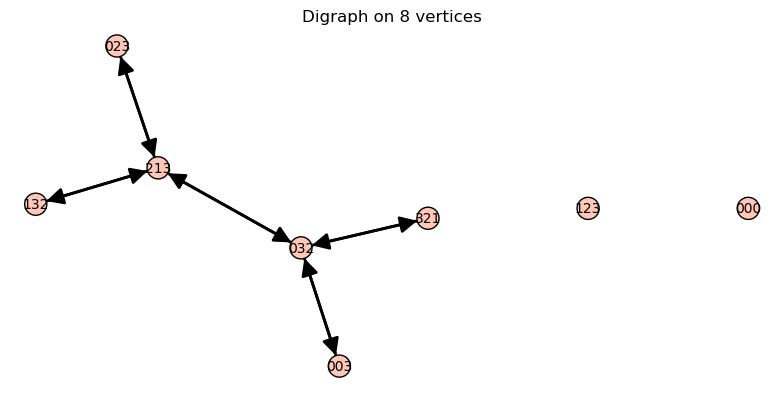

In [92]:
Mon.quiver()

# $\mathcal{R}$-Order of the $0$-Rook Monoid

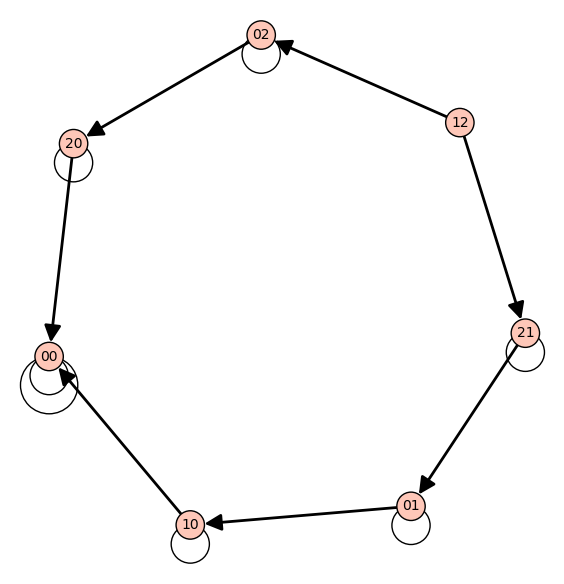

In [93]:
Rook0(2).cayley_graph(side="right").plot()

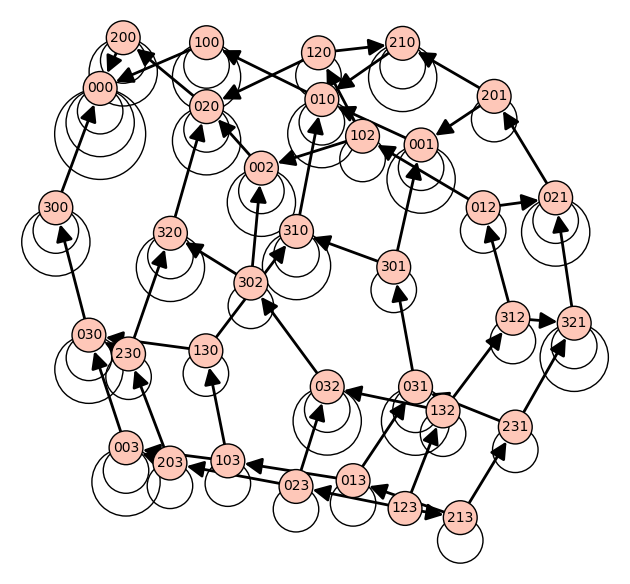

In [113]:
Rook0(3).cayley_graph(side="right").plot()

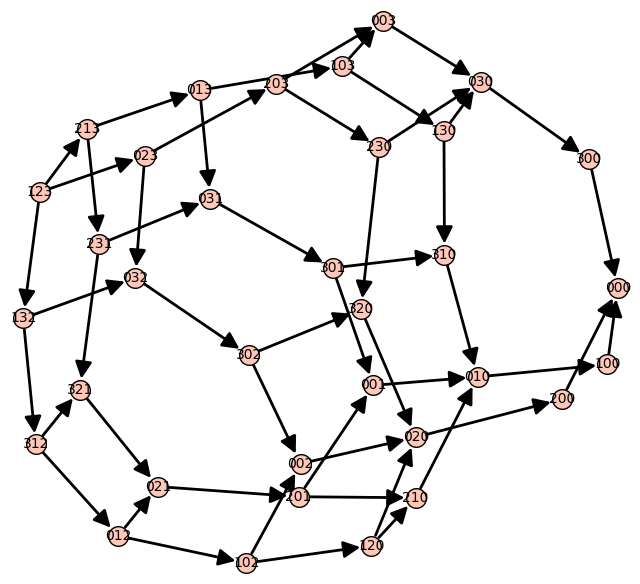

In [114]:
Gr = Rook0(3).cayley_graph(side="right")
Gr.remove_loops()  
Gr.plot()

In [115]:
# %load -s rook_lattice rook0.sage
def rook_lattice(n):
    r"""
    The right rook lattice

    We take the monoid convention, where `1` is the largest element

    Examples::

        sage: rook_lattice(3).cardinality()
        34
        sage: rook_lattice(3).is_lattice()
        True
        sage: rl2 = rook_lattice(2)
        sage: matrix([[1 if rl2.le(r1, r2) else 0
        ....:          for r1 in rooks(2)] for r2 in rooks(2)])
        [1 1 1 1 1 1 1]
        [0 1 1 1 0 0 1]
        [0 0 1 1 0 0 1]
        [0 0 0 1 0 0 1]
        [0 0 0 0 1 1 1]
        [0 0 0 0 0 1 1]
        [0 0 0 0 0 0 1]

    TESTS::

        sage: TestSuite(rook_lattice(3)).run()
    """
    one = tuple(range(1, n+1))
    Gr = Rook0(n).cayley_graph(side="right")
    Gr.remove_loops()
    Gr.relabel(lambda f : f.lift()(one))
    Gr = Gr.reverse()
    return LatticePoset(Gr)

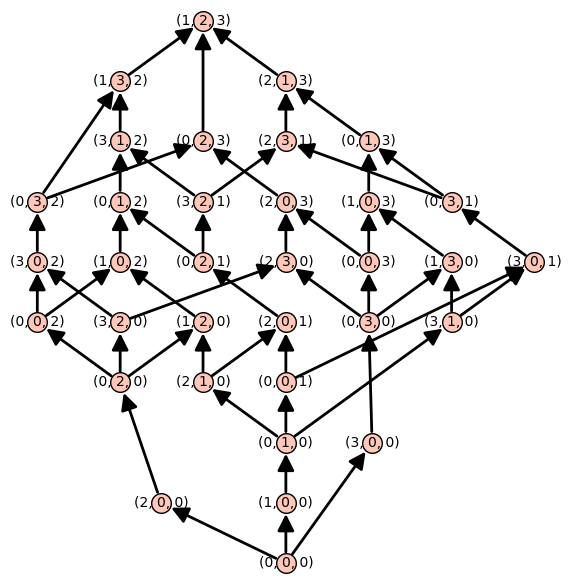

In [116]:
rook_lattice(3).plot()

In [117]:
[rook_lattice(n).is_lattice() for n in range(6)]

[True, True, True, True, True, True]

In [118]:
rl = rook_lattice(3)

In [119]:
rl2 = rook_lattice(2)
matrix([[1 if rl2.le(r1, r2) else 0
         for r1 in rooks(2)] for r2 in rooks(2)])

[1 0 1 1 0 0 1]
[1 1 1 1 1 1 1]
[0 0 1 1 0 0 1]
[0 0 0 1 0 0 1]
[0 0 0 0 1 0 1]
[0 0 0 0 1 1 1]
[0 0 0 0 0 0 1]

## rook triples

In [122]:
# %load -s support,Delta,inversion,Z,rook_triple rook0.sage
def support(r):
    r"""
    The support of a rook (Definition 4.6, page 33)

    Examples::

        sage: support([3,1,0,2])
        frozenset({1, 2, 3})
        sage: support((4,1,0,2))
        frozenset({1, 2, 4})
    """
    return frozenset(r) - frozenset({0})

@cached_function
def Delta(n):
    r"""
    The upper diagonal set

    `\Delta:=\{(b, a)\ \mid\ n\geq b>a>0\}`

    EXAMPLES::

        sage: Delta(3)
        frozenset({(2, 1), (3, 1), (3, 2)})
        sage: Delta(4)
        frozenset({(2, 1), (3, 1), (3, 2), (4, 1), (4, 2), (4, 3)})
        sage: Delta(frozenset({1, 3, 4}))
        frozenset({(3, 1), (4, 1), (4, 3)})

        sage: Delta(frozenset({1, 2, 3, 8}))
        frozenset({(2, 1), (3, 1), (3, 2), (8, 1), (8, 2), (8, 3)})
    """
    if isinstance(n, (int, Integer)):
        return frozenset((b,a) for b in range(1, n+1) for a in range(1, b))
    else:
        S = sorted(list(n))
        n = len(S)
        S = [None] + S  # Delta uses 1 based indexes
        return frozenset((S[i],S[j]) for (i,j) in Delta(n))

def inversion(r):
    r"""
    The inversion set of a rook (Definition 4.1, page 33)

    EXAMPLES::

        sage: inversion((3,1,0,2))
        frozenset({(3, 1), (3, 2)})
        sage: inversion((3,1,5,0,2))
        frozenset({(3, 1), (3, 2), (5, 2)})
        sage: inversion((3,1,5,0,2,4))
        frozenset({(3, 1), (3, 2), (5, 2), (5, 4)})
    """
    r = [x for x in r if x != 0]
    res = [(r[j], r[i]) for i in range(len(r)) for j in range(i) if r[j] > r[i]]
    return frozenset(res)

def Z(r):
    r"""
    The zero-after number of a rook (Definition 4.6, page 33)

    EXAMPLES::

        sage: Z((3,1,5,0,2))
        {1: 1, 2: 0, 3: 1, 5: 1}
        sage: Z((3,0,5,0,2))
        {2: 0, 3: 2, 5: 1}
    """
    S = support(r)
    r = list(r)
    res = dict()
    for a in S:
        i = r.index(a)
        res[a] = r[i:].count(0)
    return res

def rook_triple(r):
    r"""
    The rook triple associate to a rook (Definition 4.6, page 33)

    EXAMPLES::

        sage: rook_triple((2,0,5,4,0,0,1))
        (frozenset({1, 2, 4, 5}),
         frozenset({(2, 1), (4, 1), (5, 1), (5, 4)}),
         {1: 0, 2: 3, 4: 2, 5: 2})
    """
    return (support(r), inversion(r), Z(r))

In [123]:
rook_triple((2,0,5,4,0,0,1))

(frozenset({1, 2, 4, 5}),
 frozenset({(2, 1), (4, 1), (5, 1), (5, 4)}),
 {1: 0, 2: 3, 4: 2, 5: 2})

## recovering a rook from its triple

In [125]:
# %load -s from_inversion,from_rook_triple rook0.sage
@cached_function
def from_inversion(S, inv):
    r"""
    A word from its support and inversion set

    EXAMPLES::

        sage: from_inversion( frozenset({1, 2, 4, 5}),
        ....:     frozenset({(2, 1), (4, 1), (5, 1), (5, 4)}))
        [2, 5, 4, 1]

        sage: from_inversion(frozenset([1, 2, 3]), frozenset([(3, 1)]))
        Traceback (most recent call last):
        ...
        TypeError: Digraph is not acyclic; there is no topological sort.

        sage: from_inversion(frozenset({1, 2, 3, 8}),
        ....:                frozenset({(2, 1), (3, 1), (3, 2)}))
        [3, 2, 1, 8]
    """
    from sage.graphs.linearextensions import LinearExtensions
    d = DiGraph()
    d.add_vertices(S)
    for (b,a) in Delta(S):
        assert a in S
        assert b in S
        if (b,a) in inv:
            d.add_edge((b,a))
        else:
            d.add_edge((a,b))
    return d.topological_sort()

def from_rook_triple((Sr, Ir, Zr), n):
    r"""
    Recovering a rook from its rook triple (Proposition 4.8, page 33)

    EXAMPLE::

        sage: from_rook_triple(
        ....:    (frozenset({1, 2, 4, 5}),
        ....:     frozenset({(2, 1), (4, 1), (5, 1), (5, 4)}),
        ....:     {1: 0, 2: 3, 4: 2, 5: 2}), 7)
        (2, 0, 5, 4, 0, 0, 1)

    TESTS::

        sage: n = 5
        sage: for r in rooks(n):
        ....:     assert r == from_rook_triple(rook_triple(r), n)
    """
    res = []
    oldZ = n-len(Sr)
    for l in from_inversion(Sr, Ir):
        assert Zr[l] <= oldZ
        res.extend([0]*(oldZ-Zr[l]))
        res.append(l)
        oldZ = Zr[l]
    res.extend([0]*oldZ)
    return tuple(res)


In [126]:
from_rook_triple(
    (frozenset({1, 2, 4, 5}),
     frozenset({(2, 1), (4, 1), (5, 1), (5, 4)}),
     {1: 0, 2: 3, 4: 2, 5: 2}), 7)

(2, 0, 5, 4, 0, 0, 1)

In [128]:
for n in range(7):
    for r in rooks(n):
        assert r == from_rook_triple(rook_triple(r), n)

## Comparing two rooks

In [131]:
# %load -s leqI rook0.sage
def leqI(r, u):
    r"""
    Comparing rooks (Definition \reff{def-rook-order})

    We check for Theorem 4.16, page 35::

        sage: n = 4
        sage: Mon = Rook0(n)
        sage: rl = rook_lattice(n)
        sage: for r1 in rooks(n):
        ....:     for r2 in rooks(n):
        ....:         assert leqI(r1, r2) == rl.le(r1, r2)
    """
    (Su, Iu, Zu) = rook_triple(u)
    (Sr, Ir, Zr) = rook_triple(r)
    if not Sr.issubset(Su):
        return False
    for (b, a) in Iu:
        if b in Sr and (b, a) not in Ir:
            return False
    for l in Sr:
        if not Zu[l] <= Zr[l]:
            return False
    return True

In [132]:
for n in range(5):
    Mon = Rook0(n)
    rl = rook_lattice(n)
    for r1 in rooks(n):
        for r2 in rooks(n):
            assert leqI(r1, r2) == rl.le(r1, r2)

In [142]:
# %load -s invdict,transitive_closure,max_compatible_set,min_dual_compatible_set,interS2 rook0.sage
def invdict(I):
    r"""
    Iversion as a dict

    EXAMPLES::

        sage: invdict(frozenset({(6,5), (4,3), (5,3), (6,3)}))
        {4: {3}, 5: {3}, 6: {3, 5}}
    """
    import collections
    res = collections.defaultdict(set)
    for (b, a) in I:
        res[b].add(a)
    return dict(res)

def transitive_closure(I):
    """
    Trasitive Closure:

    EXAMPLES::

        sage: transitive_closure(frozenset([(3,2), (2,1)]))
        frozenset({(2, 1), (3, 1), (3, 2)})
        sage: transitive_closure(frozenset([(4,3),(3,2), (2,1)]))
        frozenset({(2, 1), (3, 1), (3, 2), (4, 1), (4, 2), (4, 3)})
    """
    return frozenset([(a,b) for (a,b,_) in
                      DiGraph(list(I)).transitive_closure().edges()])

def max_compatible_set(S, I):
    """
    Maximal `I`-compatible set (Definition 4.12, page 34)

    precondition: S is supposed transitively closed

    EXAMPLES::

        sage: max_compatible_set(frozenset({1,2,4,5}), frozenset({(4,3), (5,3)}))
        frozenset({1, 2})
        sage: max_compatible_set(frozenset({1,2,4,5,6}),
        ....:     frozenset({(6,5), (4,3), (5,3), (6,3)}))
        frozenset({1, 2})
    """
    I = invdict(I)
    res = set()
    for b in S:
        if b not in I or I[b].issubset(S):
            res.add(b)
    return frozenset(res)

def min_dual_compatible_set(S, I, n):
    """
    Minimal `I`-compatible set (Definition 4.21, page 38)

    precondition: S is supposed transitively closed

    EXAMPLES::

        sage: min_dual_compatible_set(frozenset({1,2,4,5}),
        ....:     frozenset({(4,3), (5,3)}), 5)
        frozenset({1, 2, 3, 4, 5})
        sage: min_dual_compatible_set(frozenset({5}),
        ....:     frozenset({(6,5), (4,3), (5,3), (6,3)}), 7)
        frozenset({5, 7})
        sage: min_dual_compatible_set(frozenset({3}),
        ....:     frozenset({(6,5), (4,3), (5,3), (6,3)}), 7)
        frozenset({3, 7})
        sage: min_dual_compatible_set(frozenset({2}),
        ....:     frozenset({(6,5), (4,3), (5,3), (6,3)}), 7)
        frozenset({2, 3, 4, 5, 6, 7})
    """
    res = set(S)
    for a in S:
        for b in range(a+1, n+1):
            if (b, a) not in I:
                res.add(b)
    return frozenset(res)

def interS2(I0, S):
    r"""
    Intersection of an inversion set and a support

    EXAMPLES::

        sage: interS2(frozenset([(2,1), (4,2), (3,2)]),
        ....:         frozenset([3,2]))
        frozenset({(3, 2)})
        sage: interS2(frozenset([(2,1), (4,2), (3,2)]),
        ....:         frozenset([3,2,1]))
        frozenset({(2, 1), (3, 2)})
    """
    I = set()
    for (b, a) in I0:
        if b in S and a in S:
            I.add((b,a))
    return frozenset(I)


In [143]:
# %load -s inf rook0.sage
def inf(u, v):
    """
    The inf of the rook lattice (Theorem 4.18, page 36)

    EXAMPLES::

        sage: inf((3,1,0,5,2), (2,1,5,3,4))
        (0, 3, 2, 1, 0)

        sage: inf((2,4,1,0), (2,1,3,4))
        (2, 4, 1, 0)
        sage: inf((2,4,1,0), (2,1,4,3))
        (0, 2, 1, 0)
        sage: inf((2,4,1,0), (3,1,4,2))
        (4, 2, 1, 0)

    TESTS::

        sage: n = 4
        sage: Mon = Rook0(n)
        sage: rl = rook_lattice(n)
        sage: for u in rooks(n):
        ....:     for v in rooks(n):
        ....:         assert inf(u, v) == rl.meet(u, v)
    """
    n = len(u)
    assert n == len(v)
    (Su, Iu, Zu) = rook_triple(u)
    (Sv, Iv, Zv) = rook_triple(v)
    I0 = transitive_closure(Iu | Iv)
    S = max_compatible_set(Su & Sv, I0)
    I = interS2(I0, S)
    Idict = invdict(I)
    Z = dict()
    for x in S:
        Zx = max(Zu[x], Zv[x])
        for i in Idict.get(x, []):
            Zx = max(Zx, Zu.get(i, 0), Zv.get(i, 0))
        Z[x] = Zx
    return from_rook_triple((S, I, Z), n)

In [144]:
inf((3,1,0,5,2), (2,1,5,3,4))

(0, 3, 2, 1, 0)

In [145]:
inf((2,4,1,0), (2,1,3,4))

(2, 4, 1, 0)

In [146]:
inf((2,4,1,0), (2,1,4,3))

(0, 2, 1, 0)

In [147]:
inf((2,4,1,0), (3,1,4,2))

(4, 2, 1, 0)

In [148]:
n = 4
Mon = Rook0(n)
rl = rook_lattice(n)
for u in rooks(n):
    for v in rooks(n):
        assert inf(u, v) == rl.meet(u, v)

In [150]:
# %load -s inversion_set_bar,sup rook0.sage
def inversion_set_bar(Su, Iu):
    r"""
    Complement of an inversion set

    EXAMPLES::

        sage: inversion_set_bar(frozenset({4}),
        ....:     frozenset({(6,5), (4,3), (5,3), (6,3)}))
        {(4, 1), (4, 2), (4, 3)}
    """
    IBu = set(Delta(Su) - Iu)
    for b in Su:
        for a in range(1, b):
            if a not in Su:
                IBu.add((b, a))
    return IBu

def sup(u, v):
    r"""
    The sup of the rook lattice (Theorem 4.22, page 38)

    EXAMPLES::

        sage: sup((3,1,0,5,2), (2,1,5,3,4))
        (1, 2, 3, 4, 5)

        sage: sup((2,4,1,0), (2,1,3,4))
        (2, 1, 3, 4)
        sage: sup((2,4,1,0), (2,1,4,3))
        (2, 1, 3, 4)
        sage: sup((2,4,1,0), (3,1,4,2))
        (3, 1, 2, 4)

    TESTS::

        sage: n = 4
        sage: Mon = Rook0(n)
        sage: rl = rook_lattice(n)
        sage: for u in rooks(n):
        ....:     for v in rooks(n):
        ....:         assert sup(u, v) == rl.join(u, v)
    """
    n = len(u)
    assert n == len(v)
    (Su, Iu, Zu) = rook_triple(u)
    IBu = inversion_set_bar(Su, Iu)
    (Sv, Iv, Zv) = rook_triple(v)
    IBv = inversion_set_bar(Sv, Iv)
    I0 = Delta(n) - transitive_closure(IBu | IBv)
    S = min_dual_compatible_set(Su | Sv, I0, n)
    I = interS2(I0, S)
    Idict = invdict(I)
    Z = dict()
    for x in S:
        Zx = min(n - len(S), Zu.get(x, n), Zv.get(x, n))
        for i in frozenset(range(x)) - Idict.get(x, set()):
            Zx = min(Zx, Zu.get(i, n))
            Zx = min(Zx, Zv.get(i, n))
            Z[x] = Zx
    return from_rook_triple((S, I, Z), n)

In [151]:
sup((3,1,0,5,2), (2,1,5,3,4))

(1, 2, 3, 4, 5)

In [152]:
sup((2,4,1,0), (2,1,3,4))

(2, 1, 3, 4)

In [153]:
sup((2,4,1,0), (2,1,4,3))

(2, 1, 3, 4)

In [154]:
sup((2,4,1,0), (3,1,4,2))

(3, 1, 2, 4)

In [155]:
n = 4
Mon = Rook0(n)
rl = rook_lattice(n)
for u in rooks(n):
    for v in rooks(n):
        assert sup(u, v) == rl.join(u, v)